<a href="https://colab.research.google.com/github/dynasty-29/Productivity-Prediction-Project/blob/main/productivity_prediction_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PRODUCTIVITY PREDICTION OF GARMENT INDUSTRY EMPLOYEES**


# **1. Introduction**

## **Overview**

The garment industry deals with the production of different types of clothing. It is a trillion-dollar industry on the global scale ([reference](https://fashionunited.com/global-fashion-industry-statisticshttps://)), and is a labor- and capital-intensive industry. Workforce productivity in general refers to a measurement of goods and/or services produced by a group of workers within a given time period. High productivity levels by a team translate to higher profits, and are an indication of efficient use of the inputs in the production process. Worker productivity in the garment industry should therefore be maximized as it is a key factor to its success.

## **Defining the question**

The main objective of the study is to create a model that can predict the level of productivity of employee teams in the garment industry.


**Why?**

Low workforce productivity in a company can lead to reduced profitability, increased conflict, high employee turnover, and a lack of motivation. It is therefore important for a company to be able to track and predict its levels of productivity and investigate the factors that influence this. 

## **Metrics for success**


* Building a model that can predict employee productivity (Best model should have the lowest RMSE of about 0.1 or less).
* Identifying the top factors influencing the productivity level of employees.


## **Recording experimental design**

*   Determine the main objectives
*   Load and preview the dataset.
*   Understand the data.
*   Prepare the dataset - Identify outliers, anomalies, duplicates, missing values, and determine how deal with them etc.
*    Carry out univariate analysis, bivariate analysis, and modelling.
*   Challenge the solution.
*   Conclusion and recommendations

## **Data source and column explanations**

The dataset is from UCI machine learning repository and can be accessed [here](http://archive.ics.uci.edu/ml/datasets/Productivity+Prediction+of+Garment+Employees).

Column definitions:

1. date : Date in MM-DD-YYYY
2. day : Day of the Week
3. quarter : A portion of the month. A month was divided into four quarters
4. department : Associated department with the instance
5. team_no : Associated team number with the instance
6. no_of_workers : Number of workers in each team
7. no_of_style_change : Number of changes in the style of a particular product
8. targeted_productivity : Targeted productivity set by the Authority for each team for each day.
9. smv : Standard Minute Value, it is the allocated time for a task
10. wip : Work in progress. Includes the number of unfinished items for products
11. over_time : Represents the amount of overtime by each team in minutes
12. incentive : Represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action.
13. idle_time : The amount of time when the production was interrupted due to several reasons
14. idle_men : The number of workers who were idle due to production interruption
15. actual_productivity : The actual % of productivity that was delivered by the workers.




# **2. Data Loading**

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## **Loading and Checking the Data**

In [ ]:
#reading csv file

df= pd.read_csv('garments_worker_productivity.csv')

In [ ]:
#previewing top rows
df.head(4)

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570


In [ ]:
#previewing bottom 4 rows
df.tail(4)

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.9,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.9,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.9,NaN,1800,0,0.0,0,0,15.0,0.505889
1196,3/11/2015,Quarter2,finishing,Wednesday,6,0.70,2.9,NaN,720,0,0.0,0,0,6.0,0.394722


In [ ]:
# checking the shape of the dataset
df.shape

#the dataset has 1197 rows and 15 columns

(1197, 15)

In [ ]:
#Checking datatypes, null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

# **3. Data Cleaning**

In [ ]:
#renaming ambiguous columns
df = df.rename(columns={'wip': 'work_in_progress', 'smv':'std_minute_value'})

In [ ]:
#separating variables for ease of analysis to those that can
#be considered continuous and categorical  
cat = ["quarter", "department", "day", "team", "no_of_style_change"]
contin = ["targeted_productivity", "std_minute_value", "work_in_progress", "over_time", "idle_men", "incentive", "idle_time", "no_of_workers", "actual_productivity"]

In [ ]:
#checking for missing values
df.isnull().sum()


#506 null values in work in progress

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
std_minute_value           0
work_in_progress         506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [ ]:
#checking skewness
df.work_in_progress.skew()
#data is positively skewed

9.741786273952965

In [ ]:
#filling in missing values with median as opposed to mean since the data is skewed

df['work_in_progress'].fillna(df['work_in_progress'].median(),inplace=True)

In [ ]:
df.work_in_progress.median()

1039.0

In [ ]:
#checking that there are no longer missing values
df.isnull().sum()

date                     0
quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
std_minute_value         0
work_in_progress         0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64

In [ ]:
# Checking for duplicates
df.duplicated().sum()

#no duplicates in the dataset

0

In [ ]:
#function to remove _ from titles

def title(x):
  return x.replace('_', ' ')


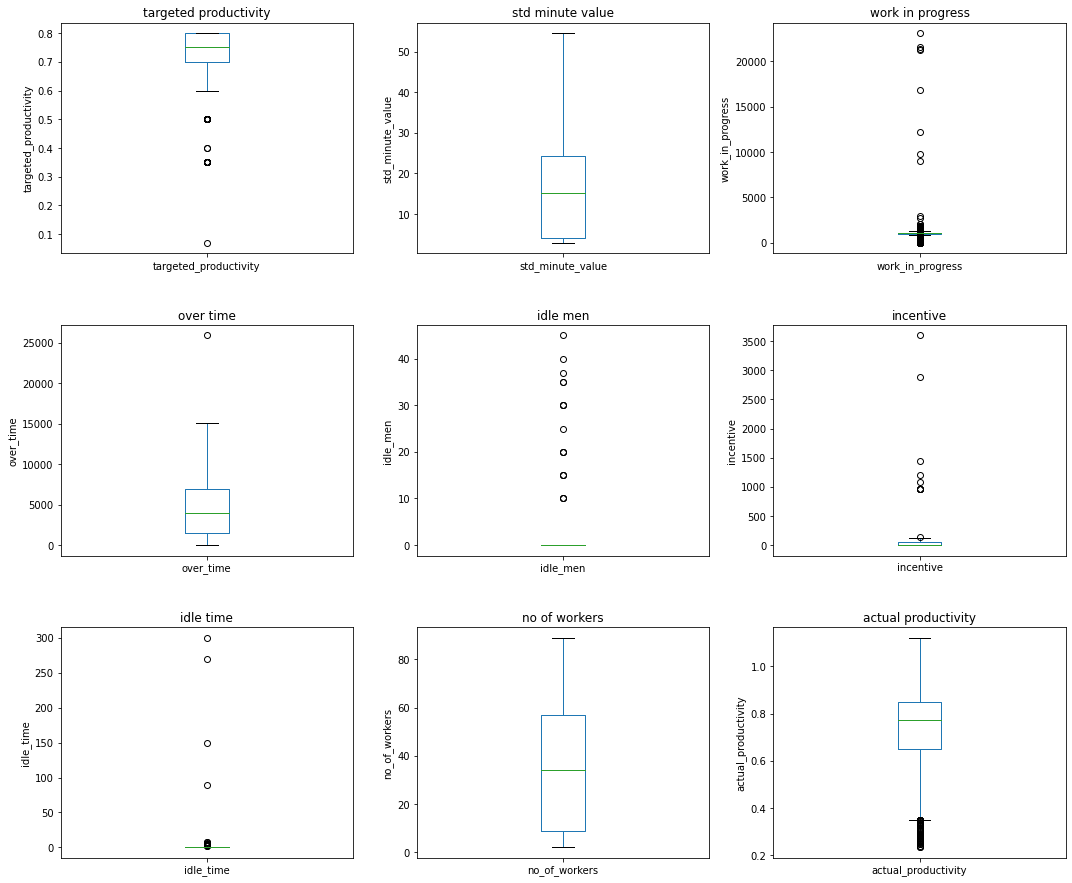

In [ ]:
# Checking for outliers in continuous data

fig,axes = plt.subplots(nrows=3, ncols=3,figsize=(15,8))


#plotting boxplots
for i, ax in enumerate(axes.ravel()):
  df.boxplot(contin[i], grid=False, ax=ax)
  ax.set_title(f"{title(contin[i])}")
  ax.set_ylabel(contin[i])


fig.tight_layout()
plt.subplots_adjust(top=1.5)
plt.show()

There were outliers in targeted productivity, overtime, work in progress, incentive, idle time, idle men, and actual productivity columns. They will not be dropped as they are likely due to natural variability in the workflow of different teams, where some teams perform significantly above or below average in terms of time, pending work, and productivity. Also, the performance of a particular team can vary on different days, with some days being significantly above or below average.

In [ ]:
#checking for anomalies

#None of the values in the continuous columns should be negative
for col in contin:
  print(len(df[df[col] < 0]))
#none had values < 0 

0
0
0
0
0
0
0
0
0


In [ ]:
#checking for anomalies

#number of workers in each team should be a whole number
df['no_of_workers'].unique()

#there are some values with decimal points. 

array([59. ,  8. , 30.5, 56. , 57.5, 55. , 54. , 18. , 60. , 12. , 20. ,
       17. , 56.5, 54.5, 29.5, 31.5, 31. , 55.5, 58. , 10. , 16. , 32. ,
       58.5, 15. ,  5. , 57. , 53. , 51.5,  2. ,  9. ,  7. , 19. , 28. ,
       34. , 89. , 14. , 25. , 52. ,  4. , 21. , 35. , 51. , 33. , 11. ,
       33.5, 22. , 26. , 27. , 59.5, 50. , 44. , 49. , 47. , 48. , 42. ,
       24. , 45. , 46. , 39. , 38. ,  6. ])

In [ ]:
#to deal with the anomalies above, the figures will be truncated

df['no_of_workers'] = df['no_of_workers'].apply(lambda x: int(x))

In [ ]:
#checking that the figures were truncated

df['no_of_workers'].unique()

array([59,  8, 30, 56, 57, 55, 54, 18, 60, 12, 20, 17, 29, 31, 58, 10, 16,
       32, 15,  5, 53, 51,  2,  9,  7, 19, 28, 34, 89, 14, 25, 52,  4, 21,
       35, 33, 11, 22, 26, 27, 50, 44, 49, 47, 48, 42, 24, 45, 46, 39, 38,
        6])

In [ ]:
#checking for anomalies 

for col in cat:
  print(col)
  print(df[col].unique())
  
  
  print('\n')

quarter
['Quarter1' 'Quarter2' 'Quarter3' 'Quarter4' 'Quarter5']


department
['sweing' 'finishing ' 'finishing']


day
['Thursday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday']


team
[ 8  1 11 12  6  7  2  3  9 10  5  4]


no_of_style_change
[0 1 2]




A month was divided into 4 quarters. However, there is a 'Quarter5' value observed.

Also, under department spelling of sewing is wrong and finishing appears as a unique value twice due to whitespace.

In [ ]:
#exploring the anomalous quarter5
df[df['quarter'] == 'Quarter5']

,date,quarter,department,day,team,targeted_productivity,std_minute_value,work_in_progress,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
498,1/29/2015,Quarter5,sweing,Thursday,2,0.80,22.52,1416.0,6840,113,0.0,0,0,57,1.000230
499,1/29/2015,Quarter5,finishing,Thursday,4,0.80,4.30,1039.0,1200,0,0.0,0,0,10,0.989000
500,1/29/2015,Quarter5,sweing,Thursday,3,0.80,22.52,1287.0,6840,100,0.0,0,0,57,0.950186
501,1/29/2015,Quarter5,sweing,Thursday,4,0.80,22.52,1444.0,6900,88,0.0,0,0,57,0.900800
502,1/29/2015,Quarter5,sweing,Thursday,10,0.80,22.52,1088.0,6720,88,0.0,0,0,56,0.900130
503,1/29/2015,Quarter5,finishing,Thursday,6,0.50,2.90,1039.0,1200,0,0.0,0,0,10,0.899000
504,1/29/2015,Quarter5,finishing,Thursday,8,0.65,4.15,1039.0,960,0,0.0,0,0,8,0.877552
505,1/29/2015,Quarter5,finishing,Thursday,11,0.60,2.90,1039.0,960,0,0.0,0,0,8,0.864583
506,1/29/2015,Quarter5,finishing,Thursday,10,0.80,3.94,1039.0,1200,0,0.0,0,0,10,0.856950
507,1/29/2015,Quarter5,finishing,Thursday,1,0.75,3.94,1039.0,1200,0,0.0,0,0,10,0.853667


It appears that quarter5 was assigned to days of the month above 28. Since January cannot be divided into equal 4 quarters, 29th and 31st will be assigned to quarter 4.

In [ ]:
#replacing quarter5 (given to jan days above 28) with quarter4
df['quarter'] = df.quarter.str.replace('Quarter5', 'Quarter4')

In [ ]:
#checking that there are now 4 quarters only
df.quarter.unique()

array(['Quarter1', 'Quarter2', 'Quarter3', 'Quarter4'], dtype=object)

In [ ]:
# Removing the word Quarter from the quarter column and leave the numbers
df['quarter'] = df['quarter'].str.replace('Quarter','')

# Changing the datatype to numeric
df['quarter'] = df['quarter'].astype(int)

#confirming changes
print(df.quarter.unique())
print(df.quarter.dtype)

[1 2 3 4]
int64


In [ ]:
# Correcting the spelling of sewing in the department column
df['department'] = df['department'].str.replace('sweing','sewing')

# Removing the spacing from the word finishing in the department column
df['department'] = df['department'].str.replace('finishing ','finishing')

#confirming changes
df['department'].unique()

array(['sewing', 'finishing'], dtype=object)

In [ ]:
#datatype conversion

#date column to datetime

df['date'] = pd.to_datetime(df['date'])

In [ ]:
#checking that conversion occured
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   1197 non-null   datetime64[ns]
 1   quarter                1197 non-null   int64         
 2   department             1197 non-null   object        
 3   day                    1197 non-null   object        
 4   team                   1197 non-null   int64         
 5   targeted_productivity  1197 non-null   float64       
 6   std_minute_value       1197 non-null   float64       
 7   work_in_progress       1197 non-null   float64       
 8   over_time              1197 non-null   int64         
 9   incentive              1197 non-null   int64         
 10  idle_time              1197 non-null   float64       
 11  idle_men               1197 non-null   int64         
 12  no_of_style_change     1197 non-null   int64         
 13  no_

In [ ]:
#saving cleaned data
df.to_csv('cleaned_productivity',index=False)

# **4. Univariate Analysis**

In [ ]:
#statistical summaries of various numerical variables
df[contin].describe()

,targeted_productivity,std_minute_value,work_in_progress,over_time,idle_men,incentive,idle_time,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,0.729632,15.062172,1126.437761,4567.460317,0.369256,38.210526,0.730159,34.551378,0.735091
std,0.097891,10.943219,1397.653191,3348.823563,3.268987,160.182643,12.709757,22.152559,0.174488
min,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,0.700000,3.940000,970.000000,1440.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,0.800000,24.260000,1083.000000,6960.000000,0.000000,50.000000,0.000000,57.000000,0.850253
max,0.800000,54.560000,23122.000000,25920.000000,45.000000,3600.000000,300.000000,89.000000,1.120437


In [ ]:
con

['targeted_productivity',
 'std_minute_value',
 'over_time',
 'idle_men',
 'incentive',
 'idle_time',
 'no_of_workers',
 'actual_productivity']

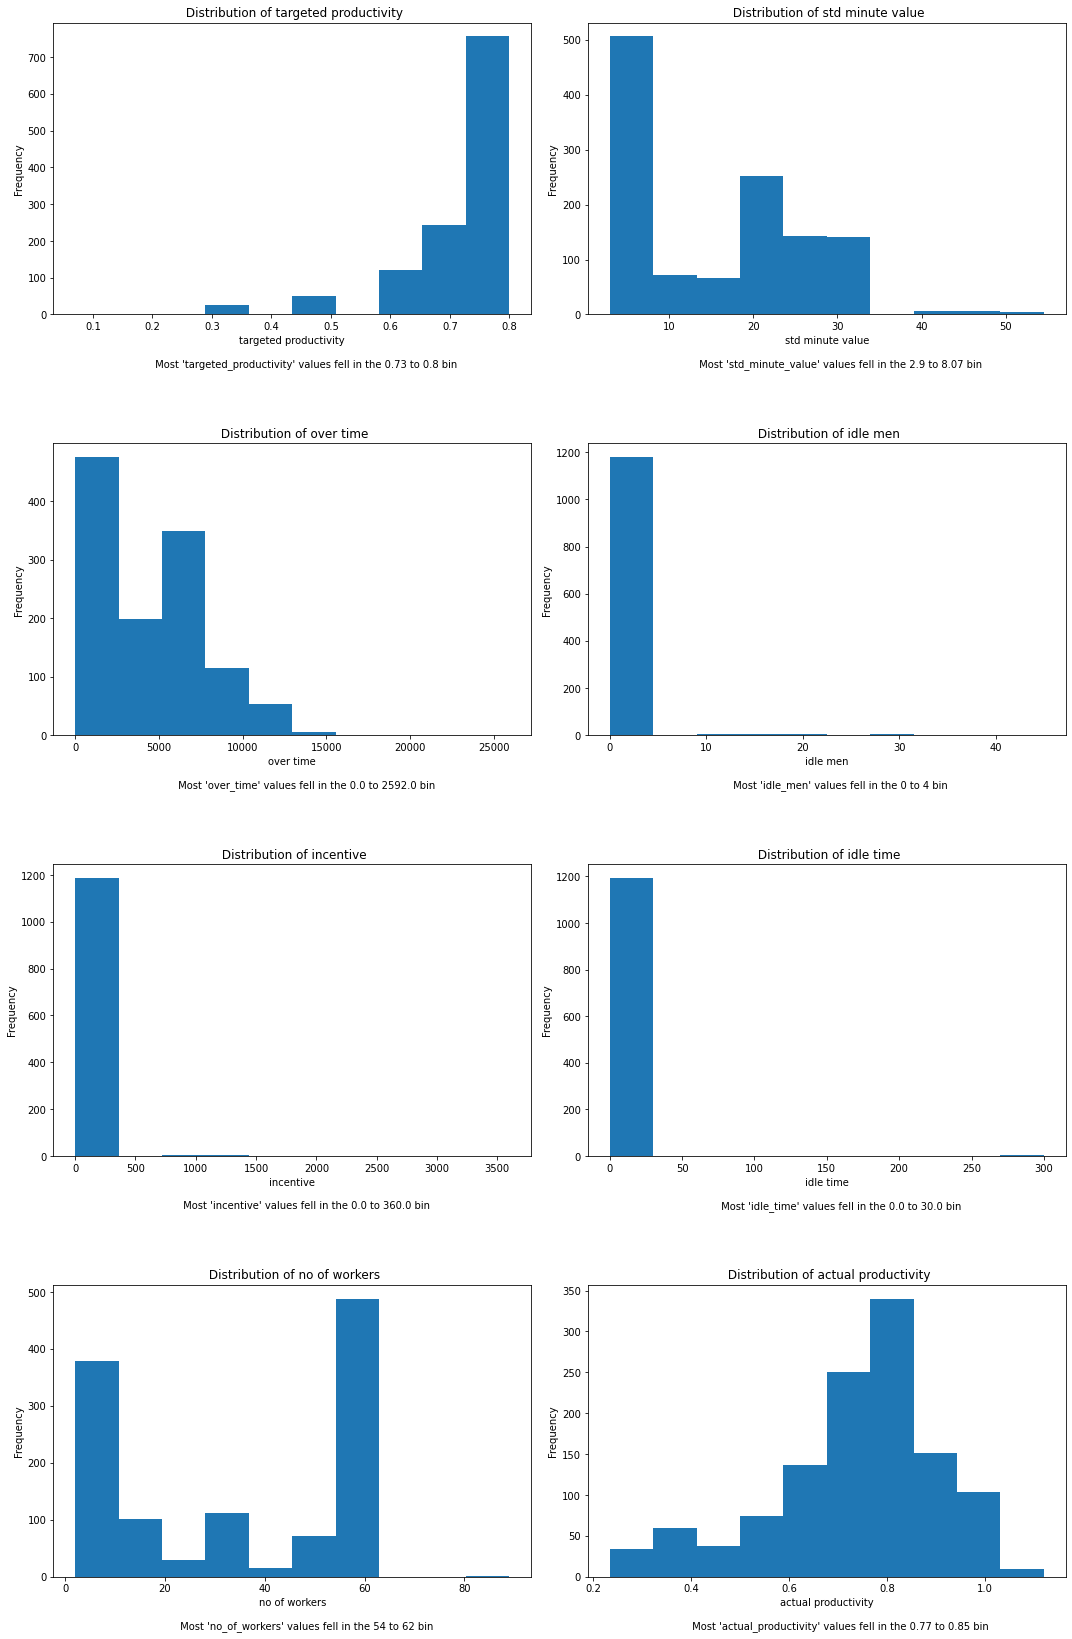

In [ ]:
# Histograms of numerical variables

fig,axes = plt.subplots(nrows=4, ncols=2,figsize=(15,15))

for i, ax in enumerate(axes.ravel()):
  (n, bins, patches) = ax.hist(df[con[i]], bins= 10)
  ax.set_title(f" Distribution of {title(con[i])}")
  ax.set_ylabel("Frequency")

  #creating a dataframe with the values of bin edges
  df_hist = pd.DataFrame(data=n, columns=['bin_values'])
  df_hist['left_bin_edge'] = bins[0:-1]
  df_hist
  last = {
    'bin_values': 0,
    'left_bin_edge': bins[-1]
  }
  df_hist = df_hist.append(last, ignore_index=True)
  #looping through dataframe above to identify bins with most frequency and the respective bin edges
  #to print observations below histogram 
  for idx in df_hist.index:
    if df_hist.loc[idx, 'bin_values'] == df_hist['bin_values'].max():
      left_edge =  df_hist.loc[idx, 'left_bin_edge']
      right_lim = df_hist.loc[idx+1, 'left_bin_edge']
      if con[i] == 'no_of_workers' or con[i] == 'idle_men':
        ax.set_xlabel(f'''{title(con[i])}

         Most '{con[i]}' values fell in the { int(left_edge)} to {int(right_lim)} bin''')

      else:
         ax.set_xlabel(f'''{title(con[i])}

         Most '{con[i]}' values fell in the { round(left_edge,2)} to {round(right_lim,2)} bin''')
         
fig.tight_layout()
plt.subplots_adjust(top=1.5)
plt.show()

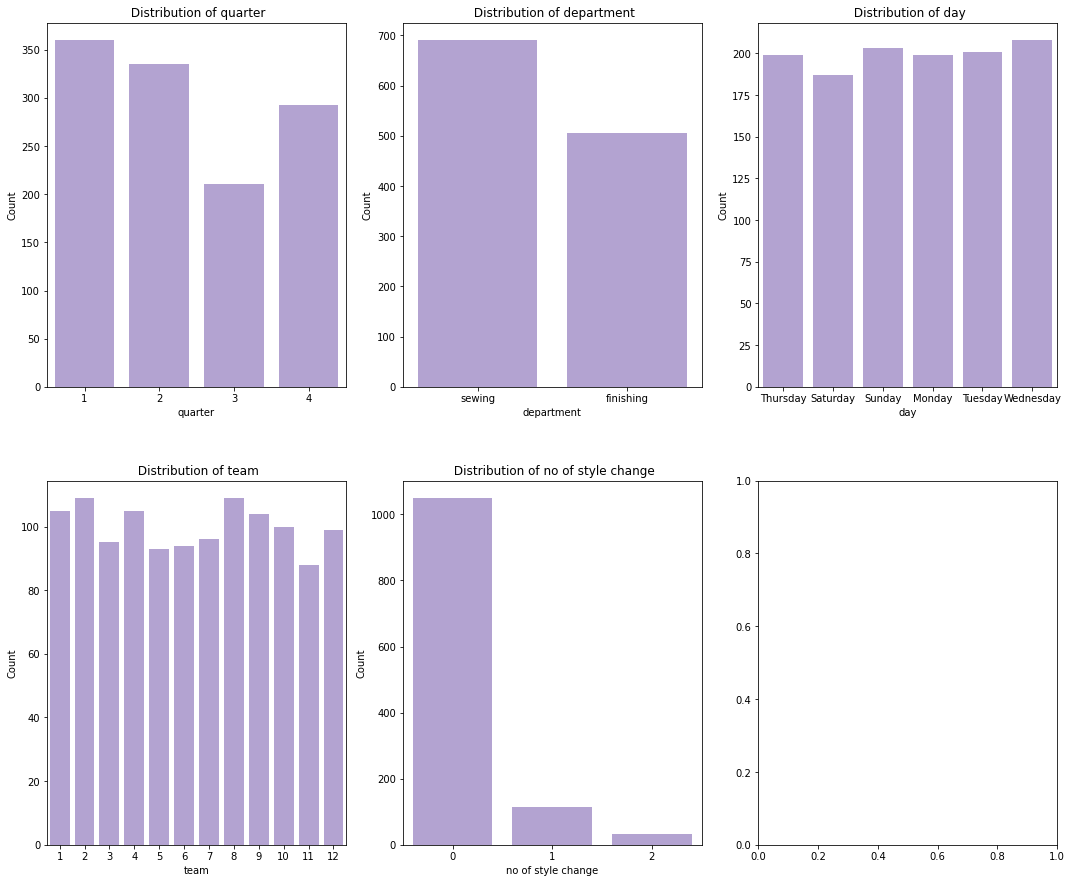

In [ ]:
#countplots
fig,axes = plt.subplots(nrows=2, ncols=3,figsize=(15,8))

for i, ax in enumerate(axes.ravel()):
  if i < 5:
    sns.countplot(x=df[cat[i]], ax=ax, color="#B19CD8")
    ax.set_title(f" Distribution of {title(cat[i])}")
    ax.set_xlabel(title(cat[i]))
    ax.set_ylabel("Count")


fig.tight_layout()
plt.subplots_adjust(top=1.5)
plt.show()

Observations:
* Quarter one had the most records in the dataset.
* There were more records related to the sewing department than the finishing department.
* The day of the week with the most records is Wednesday.
* Teams 2 and 8 appeared more frequently than other teams in the dataset.
* For most records, the number of changes in the style of a particular product was 0.

# **5. Bivariate Analysis**

***Actual productivity by day of week, department, quarter of the month, team***

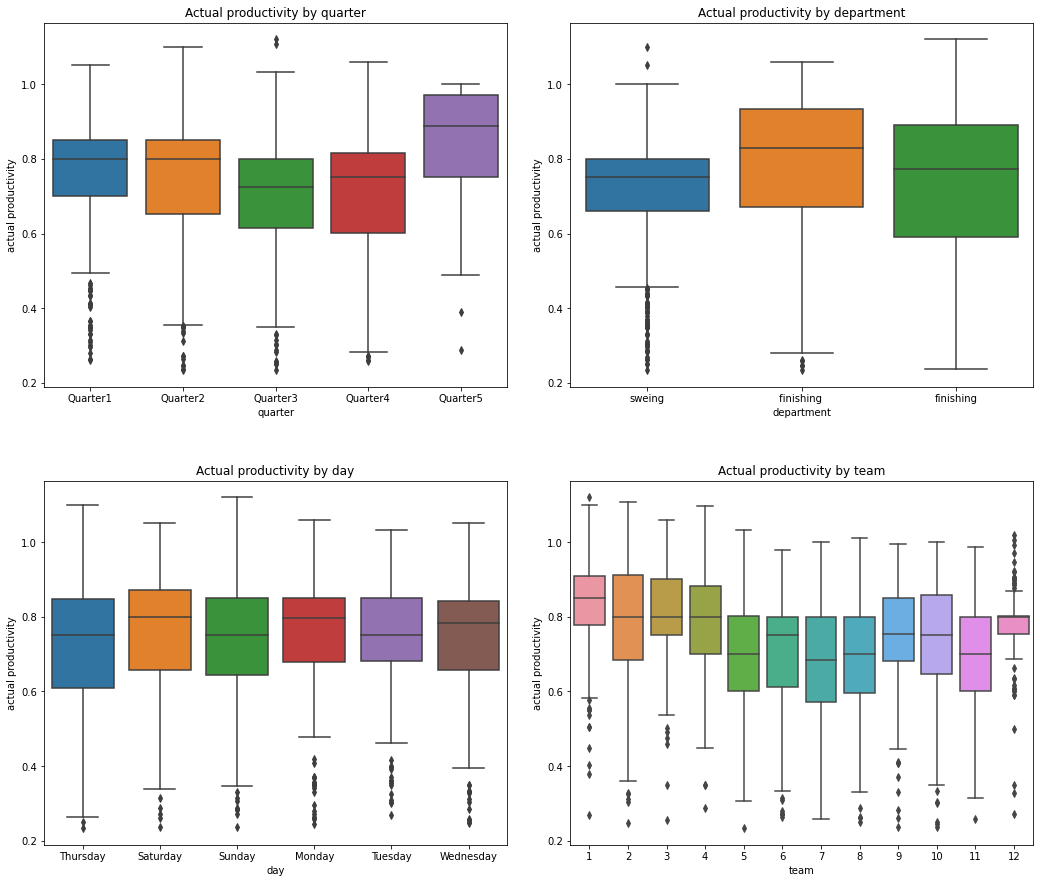

In [ ]:
fig,axes = plt.subplots(nrows=2, ncols=2,figsize=(12,8))

for i, ax in enumerate(axes.ravel()):
  # if i <= 2:
    sns.boxplot(data=df, x=cat[i], y='actual_productivity', ax=ax)
    ax.set_title(f"Actual productivity by {title(cat[i])}")
    ax.set_xlabel(title(cat[i]))
    ax.set_ylabel("actual productivity")

fig.tight_layout()
plt.subplots_adjust(top=1.5,right=1.2)
plt.show()

Observations:

The median actual productivity is highest:

* Quarters: during the first 2 quarters of the month.
* Department: in the "finishing" department
* Day: on Saturdays


***Average actual productivity by day of week, department, quarter of the month, and team.***

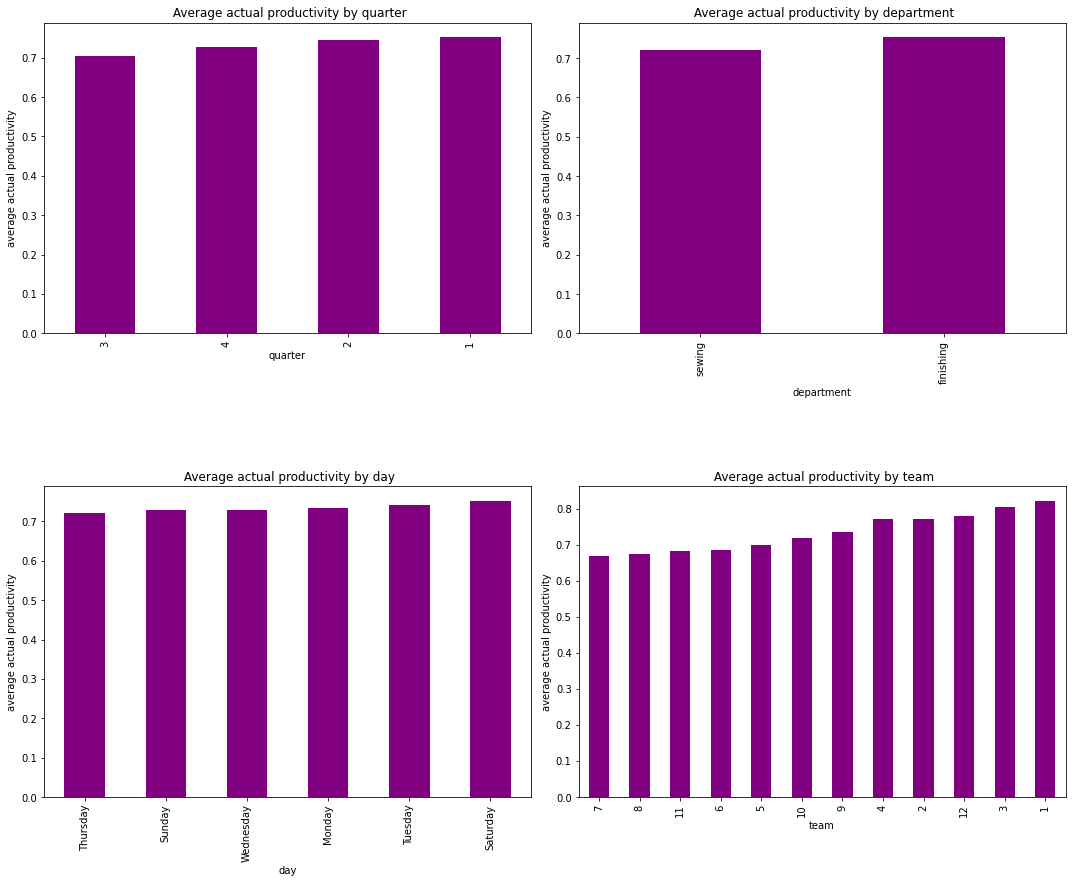

In [ ]:
fig,axes = plt.subplots(nrows=2, ncols=2,figsize=(15,8))

for i, ax in enumerate(axes.ravel()):
    
    df.groupby([cat[i]])['actual_productivity'].mean().nsmallest(df[cat[i]].nunique()).plot.bar(ax=ax, color='purple')
    
    ax.set_title(f" Average actual productivity by {title(cat[i])}")
    ax.set_xlabel(title(cat[i]))
    ax.set_ylabel("average actual productivity")

fig.tight_layout()
plt.subplots_adjust(top=1.5)
plt.show()

Observations:

The mean actual productivity is highest:
* Quarters: during the first 2 quarters of the month.
* Department: in the "finishing" department
* Day: on Saturdays
* Team: in team 1

***Average standard minute value, over time, idle men,incentive, idle time and no of workers by productivity category (>0.5 or not)***

In [ ]:
#function to group according to actual productivity levels
def categories(x):
  if x <= 0.5:
    return 'productivity <= 0.5'
  else:
    return 'productivity > 0.5'

df_cop = df.copy()
df_cop['actual_productivity_category'] = df['actual_productivity'].apply(lambda x: categories(x))

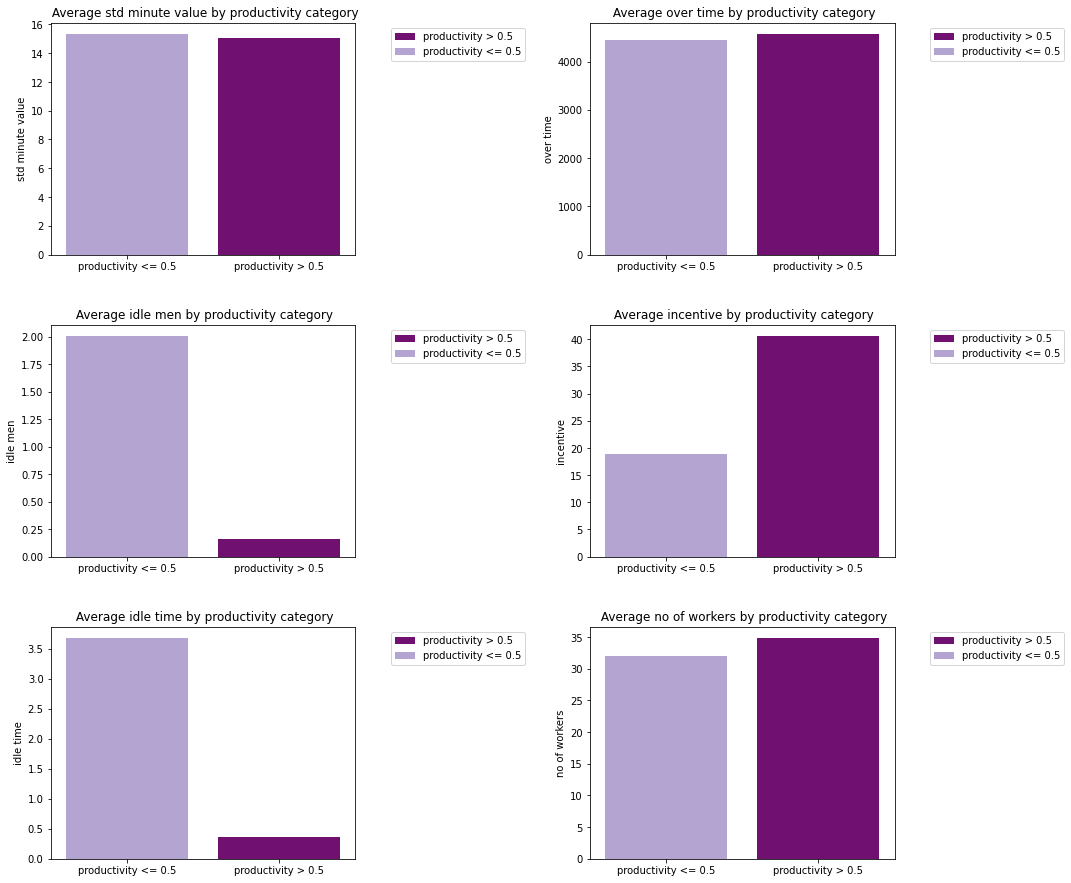

In [ ]:
#plots
colsc = ['std_minute_value',
 'over_time',
 'idle_men',
 'incentive',
 'idle_time',
 'no_of_workers']
 
fig,axes = plt.subplots(nrows=3, ncols=2,figsize=(15,8))

for i, ax in enumerate(axes.ravel()):

    # df_cop.groupby(['actual_productivity_category'])[colsc[i]].mean().plot(kind='bar', ax=ax, color=['purple','indigo'])
    sns.barplot(x=df_cop['actual_productivity_category'], y=df_cop[colsc[i]], ci=None, ax=ax,order=['productivity <= 0.5', 'productivity > 0.5'],
                hue=df_cop['actual_productivity_category'], dodge=False, palette=['purple','#B19CD9'])
    ax.set_title(f" Average {title(colsc[i])} by productivity category")
    ax.set_xlabel("")
    ax.set_ylabel(title(colsc[i]))

    ax.legend(bbox_to_anchor=(1.1,1))

fig.tight_layout()

plt.subplots_adjust(top=1.5)
plt.show()

Values higher in the category where actual productivity levels fall between are <= 0.5:
* average standard minute value
* average idle time
* average idle men

Values higher in the category where actual productivity levels are > 0.5:
* average incentive
* average number of workers
* average overtime

***Comparison between Actual Productivity and incentives over time***

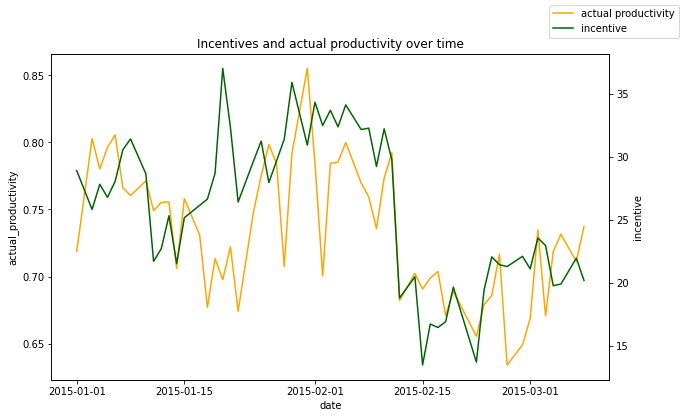

In [ ]:
#examining trend of actual productivity and incentives
df_dt = df[df.date <= pd.to_datetime('2015-03-08')]
df_dt
plt.figure(figsize=(10,6))

line1 = sns.lineplot(x='date', y='actual_productivity', data=df_dt, ci= None, color='orange', legend=False, label = 'actual productivity' )

ax2 = line1.twinx()
line2 = sns.lineplot(x='date', y='incentive', data=df_dt, ci= None, color='darkgreen',ax=ax2, legend=False, label = 'incentive')

line1.figure.legend()

plt.title("Incentives and actual productivity over time")
plt.show()

Incentives and actual productivity show similar trends, with periods of low incentives generally coinciding with periods of low actual productivity, and peaks in productivity generally coinciding with peaks in incentives.

***Comparison between Actual and Targeted Productivity over time***

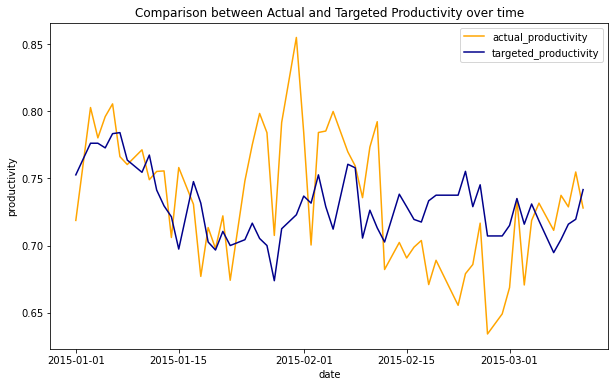

In [ ]:
# Line plot to check actual and targeted productivity
plt.figure(figsize=(10,6))

sns.lineplot(x='date', y='actual_productivity', data=df, ci= None, color='orange' )
sns.lineplot(x='date', y='targeted_productivity', data=df, ci= None, color='darkblue')

plt.legend(labels=['actual_productivity','targeted_productivity'])
plt.ylabel("productivity")
plt.title("Comparison between Actual and Targeted Productivity over time")
plt.show()

Actual productivity generally exceeded targeted productivity except from mid February to beginning of March where targets were not being met.

***Actual Productivity per Department over time***

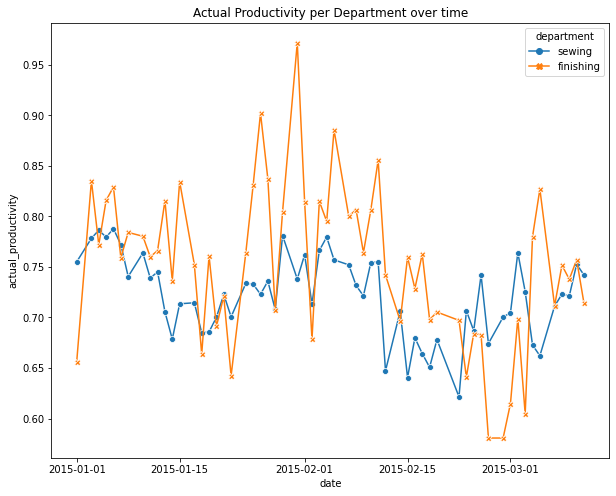

In [ ]:
# Line plot to check actual productivity vs department
plt.figure(figsize=(10,8))

sns.lineplot(x='date', y='actual_productivity', hue = 'department',style= 'department', data=df, ci= None, markers=True, dashes=False)
# sns.lineplot(x='date', y='targeted_productivity', data=df, ci= None)
plt.title("Actual Productivity per Department over time")
plt.show()

The finishing department generally had higher actual productivity than the sewing department.

***Idle time by department***




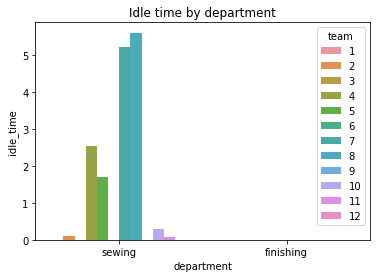

In [ ]:
sns.barplot(x='department', y='idle_time',hue ='team' ,data=df, ci= None)
plt.title("Idle time by department")
plt.show()

Only the sewing department had idle time, with team 8's sewing division recording the highest idle time.

***Idle men by department***

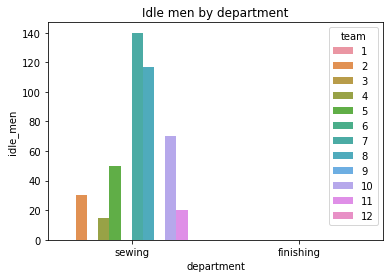

In [ ]:
sns.barplot(x='department', y='idle_men',hue ='team' ,data=df, ci= None, estimator=sum)
plt.title("Idle men by department")
plt.show()

Only the sewing department had idle men, with team 7's sewing division recording the highest number of idle men.

***Department and team with more style changes***

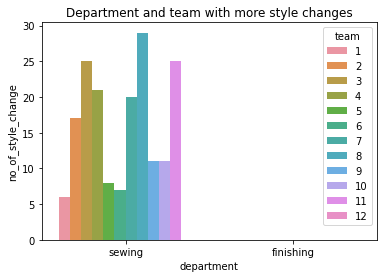

In [ ]:
sns.barplot(x='department', y='no_of_style_change',hue ='team' ,data=df, ci= None, estimator=sum)
plt.title("Department and team with more style changes")
plt.show()

Only the sewing department had style changes, with team 8's sewing division recording the highest number of style changes.


**Average Productivity of each team**

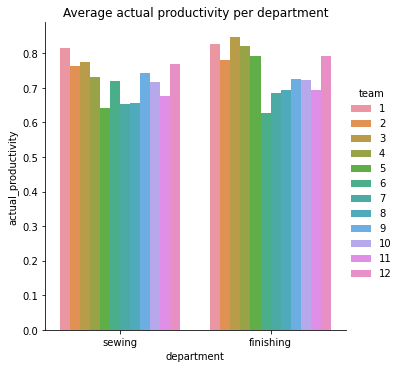

In [ ]:
sns.catplot(data=df,x='department',y='actual_productivity',hue='team', ci=None, kind = 'bar')
plt.title("Average actual productivity per department")
plt.show()

Team 1's sewing division had the highest average actual productivity in the sewing department, while in the finishing department team 3's finishing division had the highest.

Team 5's sewing division had the lowest average actual productivity in the sewing department, while in the finishing department team 6's finishing division had the highest.

In [ ]:
df[df.department == 'sewing'].groupby(['team','department'])['incentive'].mean().nsmallest(3)

team  department
7     sewing        27.109091
5     sewing        29.137931
8     sewing        31.285714
Name: incentive, dtype: float64

Teams 7, 5, and 8 (lowest performing in sewing) have the lowest average incentive in sewing

In [ ]:
df[df.department == 'finishing'].groupby(['team','department'])['incentive'].mean().nsmallest(3)

team  department
6     finishing      0.000000
7     finishing      0.000000
8     finishing     18.113208
Name: incentive, dtype: float64

Teams 6, 7, and 8 (lowest performing in finishing) have the lowest average incentive in finishing

***Pairplot of numerical variables***

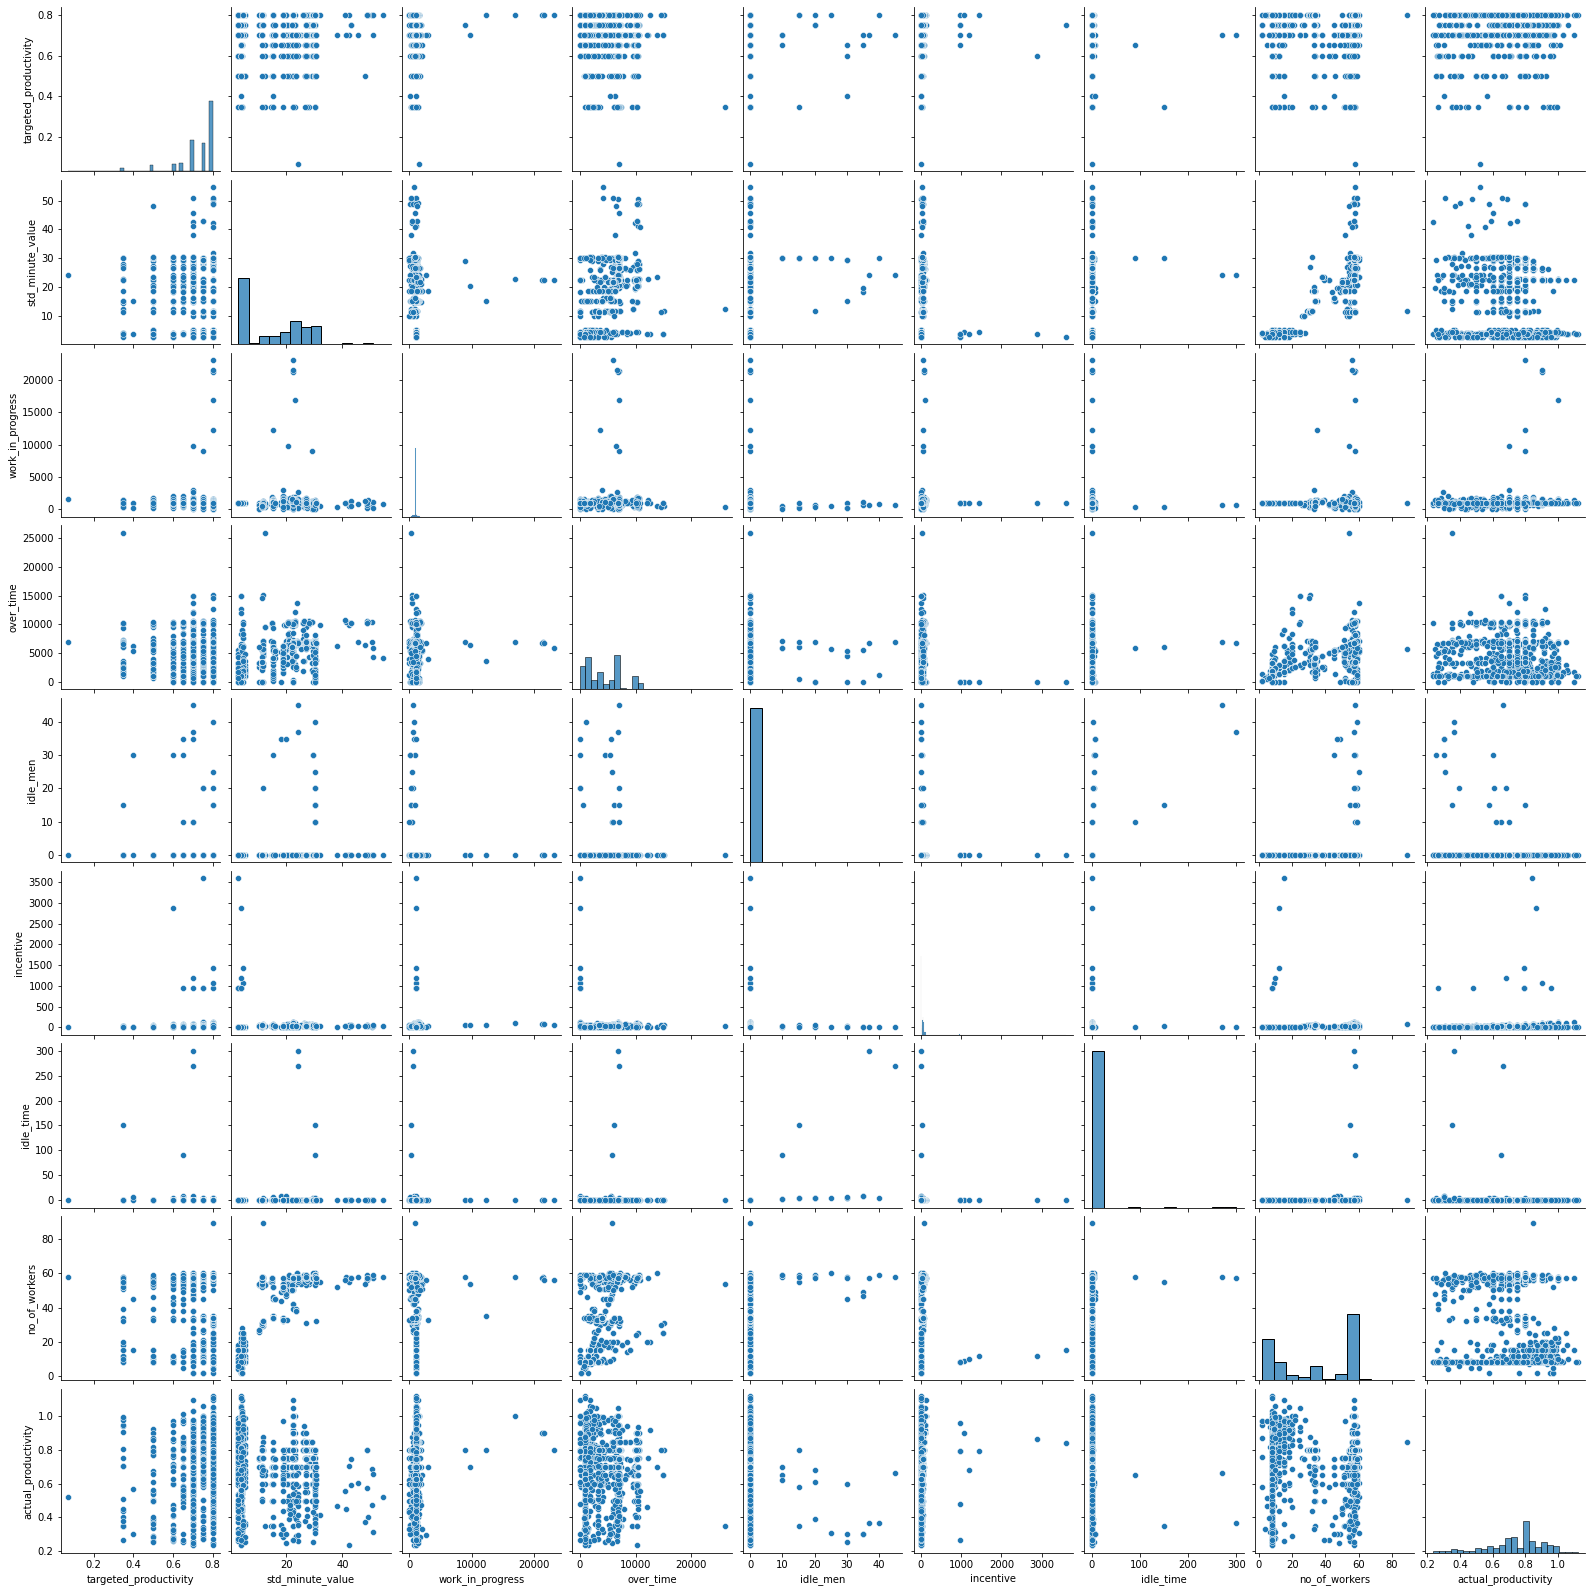

In [ ]:
#pairplots of numerical data
sns.pairplot(df[contin])
# sns.set_style('white')
fig.tight_layout()
plt.show()

Most of the visuals do not depict clear, observable linear relationships between each other.

Number of workers and overtime, standard minute value appear to have a positive linear relationship. Same case for idle time and idle men

***Encoding categorical***

In [ ]:
#checking for columns with object datatype
for col in cat:
  if df[col].dtype == "object":
    print(col)

department
day


In [ ]:
#creating a copy of the dataframe
df_enc = df.copy()

In [ ]:
print(df.day.unique())
print(df.department.unique())

['Thursday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday']
['sewing' 'finishing']


In [ ]:
#encoding
repl_dict = {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday':2,
    'Thursday':3,
    'Saturday':4,
    'Sunday':5
}
df_enc['day'] = df_enc['day'].replace(repl_dict)

df_enc['department'] = df_enc['department'].replace({'sewing':0, 'finishing':1})

In [ ]:
# checking that the values were encoded
#
print(df_enc.department.unique())
print(df_enc.day.unique())

[0 1]
[3 4 5 0 1 2]


***Correlation Heatmaps***

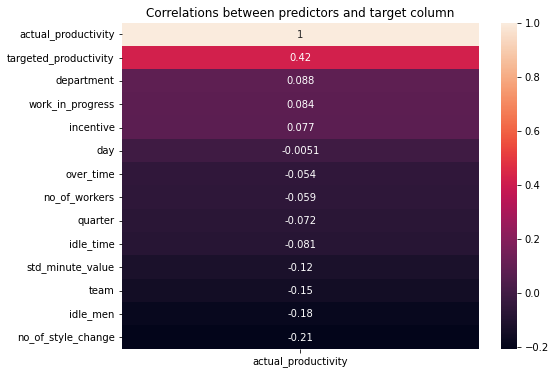

In [ ]:
#highlighting correlations specifically with target
corr = df_enc.corr()
target_col=corr[['actual_productivity']].sort_values(by='actual_productivity', ascending=False)

plt.figure(figsize=(8,6))

sns.heatmap(target_col,annot=True)
plt.title("Correlations between predictors and target column")
plt.show()

Actual productivity, the target column, has the highest correlation (moderate positive correlation of 0.42) with targeted productivity.

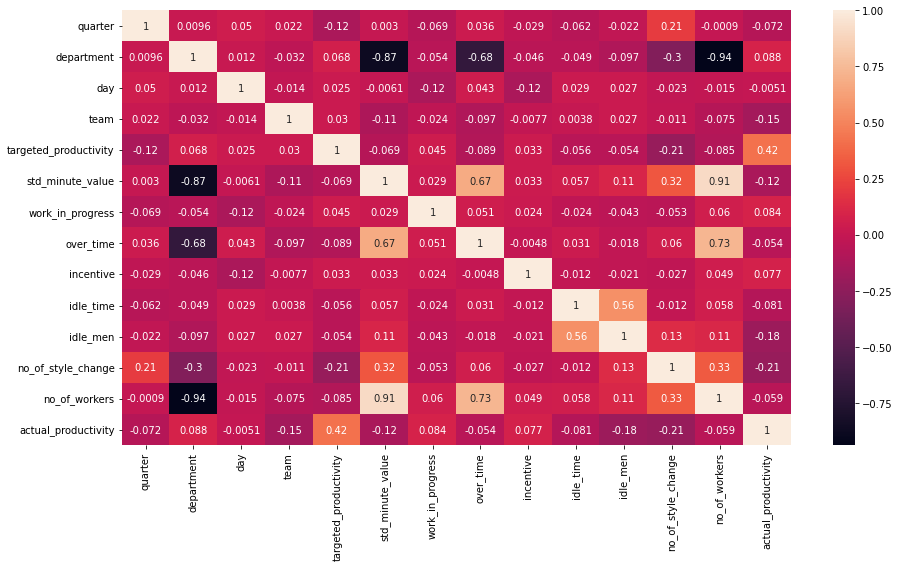

In [ ]:
#showing correlation on a heatmap

plt.figure(figsize=(15,8))
sns.heatmap(df_enc.corr(),annot=True)
plt.show()

-Actual productivity, the target column, has the highest correlation (moderate positive correlation of 0.42) with targeted productivity.

-Strong positive correlations(>0.5):
* standard minute value has strong positive correlations with number of workers and overtime

* Over time has a strong positive correlation with number of workers,  standard minute value

* Idle time and idle men have a strong positive correlation

# **6. Modelling**

In [ ]:
# from sklearn.model_selection import KFold
import scipy as sp
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

In [ ]:
#the aspects of the date of interest (quarter of the month and day of the week)
#are extracted, therefore will drop date column .

df_enc.drop(columns=['date'], inplace=True, axis=1)

#printing variables that will be used in modelling
print(df_enc.columns)

Index(['quarter', 'department', 'day', 'team', 'targeted_productivity',
       'std_minute_value', 'work_in_progress', 'over_time', 'incentive',
       'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers',
       'actual_productivity'],
      dtype='object')


In [ ]:
#separating features and target for use in modelling

X = df_enc.drop(['actual_productivity'], axis=1)

y = df_enc['actual_productivity']

In [ ]:
# Splitting dataset to train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=0)

In [ ]:
#list with feature names
x_cols = X.columns
x_cols

Index(['quarter', 'department', 'day', 'team', 'targeted_productivity',
       'std_minute_value', 'work_in_progress', 'over_time', 'incentive',
       'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers'],
      dtype='object')

In [ ]:
#scaled features
#transforming test based on values obtained from train (scaler should only be 
# fitted on train set then used to transform both train and test to prevent 
# data leakage caused by fitting on entire dataset)

sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)



In [ ]:
#highlighting the mean and range in the target column
print("mean: ", y.mean())
print("range: ", (y.max() - y.min()))

mean:  0.7350910969791145
range:  0.886732024


In [ ]:
#list that will track rmses
rmses = []

## **Linear regression**

Baseline model

In [ ]:
#using scaled features 

#fitting linear model
regression = LinearRegression()
regression.fit(X_train_sc,y_train)

#predicting on unseen data
y_pred = regression.predict(X_test_sc)

#evaluating model
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))

rmses.append((f'Baseline linear model RMSE: {rmse}'))


print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)

Mean Squared Error: 0.020625548579356095
Root Mean Squared Error: 0.14361597605891935


In [ ]:
rmses

['Baseline linear model RMSE: 0.14361597605891935']

***Checking for homoscedasticity***

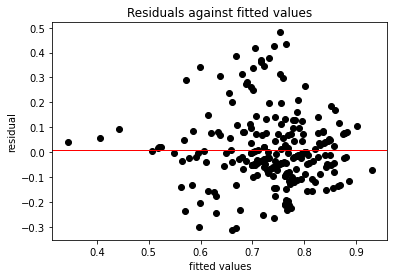

In [ ]:
# Creating the residuals by substracting the test value from the predicted 
# value for each row in the test dataset

residuals = np.subtract(y_pred, y_test)


#plotting residuals
plt.scatter(y_pred, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.title('Residuals against fitted values')
plt.show()

Data shows heterosckedascticity. Will be tested using Barlett's test to confirm.

In [ ]:
#assessing heteroscedasticity using Barlett's test

test_result, p_value = sp.stats.bartlett(y_pred, residuals)


# If the pvalue is less than the significance level of 0.05, then the null
# hypothesis is rejected - the variance is different for at least one pair of datapoints

# Otherwise the null hypothesis that 
# the variance is homogeneous across the data

#using significance level of 0.05:
if (p_value < 0.05 ):
  print('the variances are not homogenous')
else:
  print('the variances are homogeneous across the data')

the variances are not homogenous


***Checking if residuals are normally distributed***

In [ ]:
# importing the shapiro function
from scipy.stats import shapiro 


# testing for normality. extracting statistic and p value
stat, p = shapiro(residuals)


# interpreting
alpha = 0.05
if p > alpha:
	print('Sample appears to have a normal distribution')
else:
	print('Sample does not appear to have a normal distribution')
  

Sample does not appear to have a normal distribution


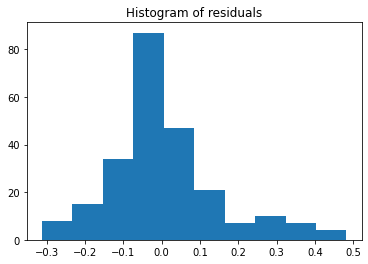


Skew of residuals: 0.8183437771135438


In [ ]:
#plotting histogram of residuals
plt.hist(residuals, bins= 10)
plt.title("Histogram of residuals")
plt.show()

print(f'\nSkew of residuals: {residuals.skew()}')

The residuals have a moderately positively skewed distribution.

***Multicollinearity check***

Another assumption of linear regression is little or no multicollinearity so checking for the presence of this phenomenon is important.

In [ ]:
#checking for multicollinearity 
#creating function that will calculate the VIF for each feature
def vif(df, features):
  vif, tolerance = {}, {}
  for feature in features:
    #extract other features other than the one chosen as y into a list
    X = [f for f in features if f!=feature]
    X, y = df[X], df[feature]
    #extract r2
    r2 = LinearRegression().fit(X, y).score(X, y)
    #calculate tolerance
    tolerance[feature] = 1-r2
    #calculate VIF
    vif[feature] = 1/tolerance[feature]
  return pd.DataFrame({'VIF': vif, 'Tolerance': tolerance})

In [ ]:
#checking multicollinearity
vif(df_enc, df_enc.drop('actual_productivity', axis=1).columns)

,VIF,Tolerance
quarter,1.084822,0.921810
department,9.587862,0.104299
day,1.037666,0.963701
team,1.135042,0.881025
targeted_productivity,1.070802,0.933879
std_minute_value,6.235678,0.160367
work_in_progress,1.033084,0.967975
over_time,2.487189,0.402060
incentive,1.024840,0.975762
idle_time,1.483492,0.674085


Features with a variance inflation factor > 5
include:
* department
* standard minute value
* number of workers (highest)

Regularisation (Ridge, lasso, and elastic net) can aid with handling multicollinearity 

## Lasso regression

Introduces penalty (on sum of absolute values of the coefficients) that shrinks coefficients and introduces more bias in the model in order to reduce the variance of the model (helps in addressing the issue of overfitting).

It can be used in feature selection because it can shrink the value of a coefficient to zero, but a drawback in cases of multicollinearity is that since it randomly selects which variable to prioritise, it may drop a column considered more useful for interpretation .

In [ ]:
#finding best hyperparameter (penalty) value for lasso
parameters = {'alpha': np.concatenate(([0.001,0.01], np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 20, 1)))}
lasso = Lasso()
#finding alpha value
search = GridSearchCV(estimator=lasso,param_grid=parameters,scoring='neg_mean_squared_error')
search.fit(X_train_sc,y_train)
print(search.best_params_)

{'alpha': 0.001}


In [ ]:
#using scaled features 

#fitting lasso model 
lasso = Lasso(alpha=0.001)
lasso.fit(X_train_sc,y_train)

#predicting on unseen data
y_pred = lasso.predict(X_test_sc)

#evaluating model
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))

rmses.append([f'Tuned lasso model RMSE: {rmse}'])


print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)

Mean Squared Error: 0.020562438394576242
Root Mean Squared Error: 0.14339608918856972


In [ ]:

for x in rmses:
  print(f'\n{x}')


Baseline linear model RMSE: 0.14361597605891935

['Tuned lasso model RMSE: 0.14339608918856972']


The root mean squared error using lasso is slightly lower than the baseline.

## Ridge Regression

Introduces penalty (on sum of squares of the coefficients) that shrinks coefficients and introduces more bias in the model in order to reduce the variance of the model (helps in addressing the issue of overfitting).

Unlike Lasso, it cant shrink the value of a coefficient to zero to completely eliminate features. It gives features with multicollinearity similar coefficients.

In [ ]:
#ridge regression
#finding best alpha value. 
parameters = {'alpha': np.concatenate(([0.001,0.01], np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 20, 1)))}
ridge = Ridge(random_state=0)
#finding alpha value
search = GridSearchCV(estimator=ridge,param_grid=parameters,scoring='neg_mean_squared_error')
search.fit(X_train_sc,y_train)
print(search.best_params_)

{'alpha': 1.9000000000000001}


In [ ]:
#using scaled features 

#fitting ridge model 
ridge = Ridge(alpha=1.9000000000000001)
ridge.fit(X_train_sc,y_train)

#predicting on unseen data
y_pred = ridge.predict(X_test_sc)

#evaluating model
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))

print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)

rmses.append(f'Tuned ridge model RMSE: {rmse}')


Mean Squared Error: 0.020613882351163158
Root Mean Squared Error: 0.14357535426097043


In [ ]:

for x in rmses:
  print(f'\n{x}')


Baseline linear model RMSE: 0.14361597605891935

['Tuned lasso model RMSE: 0.14339608918856972']

Tuned ridge model RMSE: 0.14357535426097043


The rmse with ridge is higher than lasso, lower than the baseline

## Elastic Net Regression

It is a hybrid version of lasso and ridge regression. It applies a penalty to the sum of absoulte values of coefficients as well as to the sum of squares of coefficients. 

In [ ]:
#finding best hyperparameter values - alpha and l1_ratio
elastic=ElasticNet()
parameters = {'alpha': np.concatenate(([0.0001,0.001,0.01], np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 20, 1))),
              'l1_ratio':[.2,.4,.6,.8,1]}

search=GridSearchCV(estimator=elastic,param_grid=parameters,scoring='neg_mean_squared_error')

search.fit(X_train_sc,y_train)
print(search.best_params_)

{'alpha': 0.001, 'l1_ratio': 0.2}


In [ ]:
#using scaled features 

#fitting model
elastic=ElasticNet(alpha=0.001,l1_ratio=0.2)
elastic.fit(X_train_sc,y_train)

#predicting on unseen data
y_pred = elastic.predict(X_test_sc)

#evaluating model

mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))

rmses.append(f'Tuned elastic net model RMSE: {rmse}')

print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)

Mean Squared Error: 0.02060040156773267
Root Mean Squared Error: 0.14352839986473992


In [ ]:

for x in rmses:
  print(f'\n{x}')


Baseline linear model RMSE: 0.14361597605891935

['Tuned lasso model RMSE: 0.14339608918856972']

Tuned ridge model RMSE: 0.14357535426097043

Tuned elastic net model RMSE: 0.14352839986473992


The elastic net model has an rmse slightly lower than the baseline and ridge but slightly higher than lasso

### Comparing coefficients

In [ ]:
#creating dataframe with coefficients and rank of coefficients' absolute values
df_coef = pd.DataFrame(regression.coef_, columns=['linear'], index=x_cols)
df_coef['linear rank'] = df_coef['linear'].apply(lambda x: abs(x)).rank(ascending=False)
df_coef['lasso'] = lasso.coef_
df_coef['lasso rank'] = df_coef['lasso'].apply(lambda x: abs(x)).rank(ascending=False)
df_coef['ridge'] = ridge.coef_
df_coef['ridge rank'] = df_coef['ridge'].apply(lambda x: abs(x)).rank(ascending=False)
df_coef['elastic'] = elastic.coef_
df_coef['elastic rank'] = df_coef['elastic'].apply(lambda x: abs(x)).rank(ascending=False)


df_coef.sort_values(by=['linear rank'])

,linear,linear rank,lasso,lasso rank,ridge,ridge rank,elastic,elastic rank
no_of_workers,0.102880,1.0,0.075636,1.0,0.099203,1.0,0.096055,1.0
std_minute_value,-0.081828,2.0,-0.073017,2.0,-0.080043,2.0,-0.079388,2.0
targeted_productivity,0.068463,3.0,0.067522,3.0,0.068288,3.0,0.068205,3.0
idle_men,-0.029905,4.0,-0.027494,5.0,-0.029771,4.0,-0.029371,4.0
team,-0.029159,5.0,-0.029377,4.0,-0.029189,5.0,-0.029212,5.0
department,0.018743,6.0,0.003964,11.0,0.017197,6.0,0.015213,7.0
no_of_style_change,-0.016221,7.0,-0.014505,6.0,-0.016070,7.0,-0.015826,6.0
over_time,-0.013070,8.0,-0.008079,8.0,-0.012627,8.0,-0.011916,8.0
idle_time,0.010422,9.0,0.008329,7.0,0.010335,9.0,0.009969,9.0
incentive,0.007834,10.0,0.007236,9.0,0.007885,10.0,0.007733,10.0


## KNN

In [ ]:
# Training and Predictions

#initial arbitrary value of 5
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_sc, y_train)

y_pred = knn.predict(X_test_sc)

#evaluating the model

mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))


print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)

rmses.append(f'Knn model 1 RMSE: {rmse}')


Mean Squared Error: 0.020919239939183158
Root Mean Squared Error: 0.14463485036180995


In [ ]:

for x in rmses:
  print(f'\n{x}')



Baseline linear model RMSE: 0.14361597605891935

['Tuned lasso model RMSE: 0.14339608918856972']

Tuned ridge model RMSE: 0.14357535426097043

Tuned elastic net model RMSE: 0.14352839986473992

Knn model 1 RMSE: 0.14463485036180995


RMSE with 5 neighbours is higher than all others

In [ ]:
#using grid search to tune hyperparameters
#finding best parameter values from range below
parameters = {'n_neighbors': np.arange(3, 15, 2),
              'metric': ['minkowski', 'euclidean','manhattan']}

knnr = KNeighborsRegressor()
#finding values
search = GridSearchCV(estimator=knnr,param_grid=parameters,scoring='neg_mean_squared_error')
search.fit(X_train_sc,y_train)
print(search.best_params_)

{'metric': 'manhattan', 'n_neighbors': 7}


In [ ]:
# Training and Predictions
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=7, metric='manhattan')
knn.fit(X_train_sc, y_train)

y_pred = knn.predict(X_test_sc)

#evaluating the model
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))

print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)

rmses.append(f'Knn further tuned model RMSE: {rmse}')


Mean Squared Error: 0.01871973066120965
Root Mean Squared Error: 0.13682006673441455


In [ ]:

for x in rmses:
  print(f'\n{x}')


Baseline linear model RMSE: 0.14361597605891935

['Tuned lasso model RMSE: 0.14339608918856972']

Tuned ridge model RMSE: 0.14357535426097043

Tuned elastic net model RMSE: 0.14352839986473992

Knn model 1 RMSE: 0.14463485036180995

Knn further tuned model RMSE: 0.13682006673441455


After tuning the number of neighbours and distance metric, the knn model results in lowest rmse so far

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
#Fitting the model


forest = RandomForestRegressor(n_estimators = 100, random_state=0, min_samples_split = 20, max_depth=5)
forest.fit(X_train, y_train)

# predicting
y_pred = forest.predict(X_test)


#evaluating the model

mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))


print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)

rmses.append(f'Random forest model 1 RMSE: {rmse}')



Mean Squared Error: 0.01563096541900583
Root Mean Squared Error: 0.12502385939893965


In [ ]:

for x in rmses:
  print(f'\n{x}')


Baseline linear model RMSE: 0.14361597605891935

['Tuned lasso model RMSE: 0.14339608918856972']

Tuned ridge model RMSE: 0.14357535426097043

Tuned elastic net model RMSE: 0.14352839986473992

Knn model 1 RMSE: 0.14463485036180995

Knn further tuned model RMSE: 0.13682006673441455

Random forest model 1 RMSE: 0.12502385939893965


The first random forest model has the lowest rmse observed so far

In [ ]:
#using grid search to tune hyperparameters
#finding best parameter values from range below
parameters = {'n_estimators': np.arange(50, 500, 50),
              'min_samples_split': np.arange(5, 30, 5),
              'max_depth': np.arange(2,7)}
rforest = RandomForestRegressor(random_state=0)
#finding values
search = GridSearchCV(estimator=rforest,param_grid=parameters,scoring='neg_mean_squared_error')
search.fit(X_train,y_train)
print(search.best_params_)

{'max_depth': 6, 'min_samples_split': 10, 'n_estimators': 50}


In [ ]:
#Fitting the model

forest = RandomForestRegressor(n_estimators = 50, random_state=0, min_samples_split = 10, max_depth=6)
forest.fit(X_train, y_train)

# predicting
y_pred = forest.predict(X_test)


#evaluating the model

mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))

print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)

rmses.append(f'Rforest further tuned model RMSE: {rmse}')


Mean Squared Error: 0.01528729915904316
Root Mean Squared Error: 0.12364181800282281


In [ ]:

for x in rmses:
  print(f'\n{x}')


Baseline linear model RMSE: 0.14361597605891935

['Tuned lasso model RMSE: 0.14339608918856972']

Tuned ridge model RMSE: 0.14357535426097043

Tuned elastic net model RMSE: 0.14352839986473992

Knn model 1 RMSE: 0.14463485036180995

Knn further tuned model RMSE: 0.13682006673441455

Random forest model 1 RMSE: 0.12502385939893965

Rforest further tuned model RMSE: 0.12364181800282281


After tuning the random forest further, lowest RMSE so far of 0.1236 is obtained.

## Gradient boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
#Fitting the model

gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.01, max_depth=5, random_state=0)
gbr.fit(X_train, y_train)

# Predict
y_pred = gbr.predict(X_test)


#evaluating the model
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))


print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)

rmses.append(f'Gradient boosting model 1 RMSE: {rmse}')

Mean Squared Error: 0.018325432224420048
Root Mean Squared Error: 0.13537146015471668


In [ ]:

for x in rmses:
  print(f'\n{x}')


Baseline linear model RMSE: 0.14361597605891935

['Tuned lasso model RMSE: 0.14339608918856972']

Tuned ridge model RMSE: 0.14357535426097043

Tuned elastic net model RMSE: 0.14352839986473992

Knn model 1 RMSE: 0.14463485036180995

Knn further tuned model RMSE: 0.13682006673441455

Random forest model 1 RMSE: 0.12502385939893965

Rforest further tuned model RMSE: 0.12364181800282281

Gradient boosting model 1 RMSE: 0.13537146015471668


The rmse of the first gradient boosting model is lower than that of the other models except the random forests

In [ ]:
#using grid search to tune hyperparameters
#finding best parameter values from range below
parameters = {'n_estimators': np.arange(100, 500, 100),
              'learning_rate': [0.01, 0.1, 1],
              'max_depth': np.arange(2,7)}
gdbr = GradientBoostingRegressor(random_state=0)

#finding values
search = GridSearchCV(estimator=gdbr,param_grid=parameters,scoring='neg_mean_squared_error')
search.fit(X_train,y_train)
print(search.best_params_)

{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 200}


In [ ]:
#Fitting the model

gbr = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=2, random_state=0)
gbr.fit(X_train, y_train)

# Predict 
y_pred = gbr.predict(X_test)


#evaluating the model
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))


print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)

rmses.append(f'Gboosting further tuned model RMSE: {rmse}')


Mean Squared Error: 0.015130083995843448
Root Mean Squared Error: 0.1230044064082399


In [ ]:

for x in rmses:
  print(f'\n{x}')


Baseline linear model RMSE: 0.14361597605891935

['Tuned lasso model RMSE: 0.14339608918856972']

Tuned ridge model RMSE: 0.14357535426097043

Tuned elastic net model RMSE: 0.14352839986473992

Knn model 1 RMSE: 0.14463485036180995

Knn further tuned model RMSE: 0.13682006673441455

Random forest model 1 RMSE: 0.12502385939893965

Rforest further tuned model RMSE: 0.12364181800282281

Gradient boosting model 1 RMSE: 0.13537146015471668

Gboosting further tuned model RMSE: 0.1230044064082399


The RMSE after tuning is the lowest out of all the models so far 

## Neural Networks

In [ ]:
from sklearn.neural_network import MLPRegressor

In [ ]:
mlp = MLPRegressor(hidden_layer_sizes=(50, 50), activation='identity', max_iter=2000, random_state=0)

# Fitting the model
mlp.fit(X_train_sc,y_train)

# Predict
y_pred = mlp.predict(X_test_sc)

#evaluating the model
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))


print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)

rmses.append(f'MLP model 1 RMSE: {rmse}')

Mean Squared Error: 0.020659751186981667
Root Mean Squared Error: 0.14373500334637235


In [ ]:

for x in rmses:
  print(f'\n{x}')


Baseline linear model RMSE: 0.14361597605891935

['Tuned lasso model RMSE: 0.14339608918856972']

Tuned ridge model RMSE: 0.14357535426097043

Tuned elastic net model RMSE: 0.14352839986473992

Knn model 1 RMSE: 0.14463485036180995

Knn further tuned model RMSE: 0.13682006673441455

Random forest model 1 RMSE: 0.12502385939893965

Rforest further tuned model RMSE: 0.12364181800282281

Gradient boosting model 1 RMSE: 0.13537146015471668

Gboosting further tuned model RMSE: 0.1230044064082399

MLP model 1 RMSE: 0.14373500334637235


rmse for first mlp model is high compared to the other models, only lower than knn model 1

In [ ]:
#list of different hidden layer widths
nums = [20, 30, 40, 50,60]
layer_sizes = []
def layers(nums):
  for num in nums:
    layer_sizes.append((num,num))
layers(nums)

In [ ]:
# hyperparameter tuning
parameters = {'hidden_layer_sizes' :layer_sizes,
              'alpha': [0.0001, 0.001,0.01,0.1,1],
              'learning_rate': ['constant', 'invscaling', 'adaptive'],
              'activation': ['identity','logistic','tanh','relu']}
              
mlp = MLPRegressor(random_state=0, activation='identity', max_iter=2000)
#finding values
search = GridSearchCV(estimator=mlp,param_grid=parameters,scoring='neg_mean_squared_error')
search.fit(X_train_sc,y_train)
print(search.best_params_)

{'activation': 'tanh', 'alpha': 0.1, 'hidden_layer_sizes': (40, 40), 'learning_rate': 'constant'}


In [ ]:
mlp = MLPRegressor(random_state=0,hidden_layer_sizes=(40, 40), activation='tanh', learning_rate='constant', alpha=0.1, max_iter=2000)

# Fitting the model
mlp.fit(X_train_sc,y_train)

# Predict 
y_pred = mlp.predict(X_test_sc)

#evaluating the model

mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))


print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)

rmses.append(f'MLP further tuned model RMSE: {rmse}')

Mean Squared Error: 0.01845711766201008
Root Mean Squared Error: 0.1358569750215648


In [ ]:

for x in rmses:
  print(f'\n{x}')


Baseline linear model RMSE: 0.14361597605891935

['Tuned lasso model RMSE: 0.14339608918856972']

Tuned ridge model RMSE: 0.14357535426097043

Tuned elastic net model RMSE: 0.14352839986473992

Knn model 1 RMSE: 0.14463485036180995

Knn further tuned model RMSE: 0.13682006673441455

Random forest model 1 RMSE: 0.12502385939893965

Rforest further tuned model RMSE: 0.12364181800282281

Gradient boosting model 1 RMSE: 0.13537146015471668

Gboosting further tuned model RMSE: 0.1230044064082399

MLP model 1 RMSE: 0.14373500334637235

MLP further tuned model RMSE: 0.1358569750215648


After tuning, the rmse decreases, but it is still higher than the current benchmark - the gradient boosting regressor with rmse of 0.1230

## Feature Importance 

Investigating feature importance with best model identified (lowest rmse) - The gradient boosting regressor model 2 ('learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 200)



Variable: targeted_productivity, Importance: 0.28
Variable: std_minute_value, Importance: 0.2
Variable: incentive, Importance: 0.17
Variable: no_of_workers, Importance: 0.15
Variable: team, Importance: 0.06
Variable: work_in_progress, Importance: 0.05
Variable: over_time, Importance: 0.04
Variable: idle_men, Importance: 0.03
Variable: quarter, Importance: 0.02
Variable: department, Importance: 0.01
Variable: day, Importance: 0.0
Variable: idle_time, Importance: 0.0
Variable: no_of_style_change, Importance: 0.0


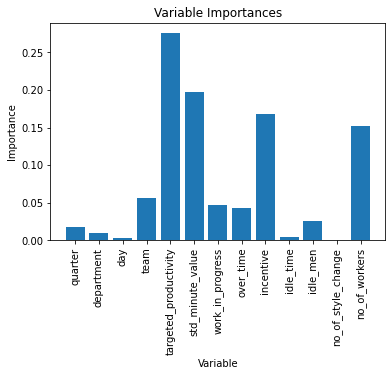

In [ ]:
# List of tuples with variable and importance using the gbc tuned model (the best recall)
importances = gbr.feature_importances_
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(x_cols, importances)]

#sorting the values in descending order
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Printing out the feature and importances 
for feat, signif in feature_importances:
  print(f'Variable: {feat}, Importance: {signif}') 

# Making a bar chart
plt.bar(x_cols, importances) 
# Tick labels for x axis
plt.xticks(rotation='vertical')

plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

### Feature selection

In [ ]:
#dropping features with importance of 0.0. Testing the gradient boosting regressor performance with
#select features
Xm = df_enc.drop(['actual_productivity','day','idle_time','no_of_style_change'], axis=1)

ym = df_enc['actual_productivity']

X_trainm, X_testm, y_trainm, y_testm = train_test_split(Xm, ym, test_size = .2, random_state=0)

In [ ]:
#using grid search to tune hyperparameters
#finding best parameter values from range below
parameters = {'n_estimators': np.arange(100, 500, 100),
              'learning_rate': [0.01, 0.1, 1],
              'max_depth': np.arange(2,7)}
gdbr = GradientBoostingRegressor(random_state=0)

#finding values
search = GridSearchCV(estimator=gdbr,param_grid=parameters,scoring='neg_mean_squared_error')
search.fit(X_trainm,y_trainm)
print(search.best_params_)

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


In [ ]:
#Fitting the model

gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0)
gbr.fit(X_trainm, y_trainm)

# Predict 
y_pred = gbr.predict(X_testm)


#evaluating the model
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))

print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)

rmses.append(f'Gboosting feature selection + tuning RMSE: {rmse}')

Mean Squared Error: 0.014275718989912223
Root Mean Squared Error: 0.11948104029473557


In [ ]:

for x in rmses:
  print(f'\n{x}')


Baseline linear model RMSE: 0.14361597605891935

['Tuned lasso model RMSE: 0.14339608918856972']

Tuned ridge model RMSE: 0.14357535426097043

Tuned elastic net model RMSE: 0.14352839986473992

Knn model 1 RMSE: 0.14463485036180995

Knn further tuned model RMSE: 0.13682006673441455

Random forest model 1 RMSE: 0.12502385939893965

Rforest further tuned model RMSE: 0.12364181800282281

Gradient boosting model 1 RMSE: 0.13537146015471668

Gboosting further tuned model RMSE: 0.1230044064082399

MLP model 1 RMSE: 0.14373500334637235

MLP further tuned model RMSE: 0.1358569750215648

Gboosting feature selection + tuning RMSE: 0.11948104029473557


After dropping the features with importance of 0.0 and tuning hyperparameters by running a grid search, the gradient boosting regressor had an rmse of 0.1194.. which is better than the previous benchmark (tuned gradient boosting regressor with all features - 0.1230). This model is therefore the best out of all tested models.

# **7. Conclusion and Recommendations**

## Conclusion

The main objectives of the project were achieved:

* The best model - a gradient boosting regressor (tuned learning rate : 0.1, max_depth 3, and n_estimators: 300) trained with these features: targeted productivity, standard minute value, incentive, number of workers, team, work in progress, over time, idle men,quarter, and department. The rmse of this model was 0.1194.

* The top factors influencing the productivity level of employees are:    
1. Targeted productivity
2. Standard minute value
3. Incentive

* The relationships between level of productivity and the predictor variables were investigated and visualised through exploratory analysis.

## Recommedations

* The management of each team in the industry should set clear, high, achievable goals each day. Targeted productivity was identified as a key feature during modelling, and it had a moderate positive correlation with actual productivity.

* Incentives motivate teams to work harder. The average incentives were higher in the category where productivity was greater than 0.5. Offering favourable incentives therefore aids in boosting productivity.

* In the sewing department, we recommend that the management of the lowest performing teams (5, 7 and 8) consider offering better incentives to their teams to motivate them more. Additionally, the management should investigate causes of high idle time in these teams, such as possible machine breakdowns.

* In the finishing department, we similarly recommend offering better incentives to the lowest performing teams (6,7,8). Teams 6 and 7 had as low as 0 average incentives.